Trabajo Práctico Final: Redes Neuronales Convolucionales en TensorFlow
📑 Consigna
Identificar un problema de clasificación de imagenes que puedan resolver utilizando una red neuronal convolucional implementada en Keras utilizando TensorFlow como vimos en clase Desarrollar un modelo para resolver en un Python Notebook, donde diseñen una red e implementen como adaptar los datos de entrada a una matriz, para pasarla por un modelo creado con Keras. Ademas en el mismo notebook deberán:

Explicar el problema a resolver y la solución propuesta
Identificar y explicar los conceptos teóricos vistos en clase sobre modelado y entrenamiento de redes neuronales. Tip: visualizar el modelo con algún paquete como keras-visualizer para explicar su comportamiento.
Visualizar los datos de entrada, ejemplos tomados del dataset, y algunos ejemplos de salida.
Se puede optar por resolver el problema con el dataset de Fashion MNIST. Este ya viene cargado en Google Colab. Pueden encontrar otros datasets en Kaggle o directamente de internet.

El trabajo se puede resolver de hasta 4 integrantes.

🔋 Bonus
Usando Streamlit deployar el modelo para que se pueda utilizar.

📅 Fecha de entrega:
📝 Formato de entrega
Entregar link al repo de GitHub donde hayan estado trabajando el Python Notebook con toda la explicación, justificación y desarrollo del trabajo. Se evaluarán los mismos conceptos del Trabajo Práctico pasado, prolijidad y explicación del código. De querer compartir el dataset, integrar el link al dataset, no los datos en si, ya que se deben visualizar algunas muestras en el notebook.

Link al forms para la entrega: Google Forms

In [1]:
%pip install tensorflow

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np


In [21]:
from tensorflow import keras


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        'train',  # Reemplaza esto con la ruta a tu directorio principal
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')  

Found 7624 images belonging to 53 classes.


In [8]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
valid_generator = valid_datagen.flow_from_directory(
        'valid',  # Reemplaza esto con la ruta a tu directorio principal
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')  

Found 265 images belonging to 53 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
test_generator = valid_datagen.flow_from_directory(
        'test',  # Reemplaza esto con la ruta a tu directorio principal
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')  

Found 265 images belonging to 53 classes.


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])

In [23]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,  # Reducido a la mitad
    epochs=10,  # Reducido en un tercio
    validation_data= valid_generator,
    validation_steps=25)  # Reducido a la mitad

Epoch 1/10
50/50 [==============================] - 52s 1s/step - loss: 20.1483 - accuracy: 0.0394 - val_loss: 3.9318 - val_accuracy: 0.1057
Epoch 2/10
50/50 [==============================] - 49s 979ms/step - loss: 3.4582 - accuracy: 0.1777
Epoch 3/10
50/50 [==============================] - 49s 978ms/step - loss: 2.6969 - accuracy: 0.3625
Epoch 4/10
50/50 [==============================] - 50s 991ms/step - loss: 2.0525 - accuracy: 0.4919
Epoch 5/10
50/50 [==============================] - 50s 998ms/step - loss: 1.7483 - accuracy: 0.5644
Epoch 6/10
50/50 [==============================] - 52s 1s/step - loss: 1.4023 - accuracy: 0.6744
Epoch 7/10
50/50 [==============================] - 50s 1s/step - loss: 1.1246 - accuracy: 0.7430
Epoch 8/10
50/50 [==============================] - 50s 992ms/step - loss: 1.0889 - accuracy: 0.7563
Epoch 9/10
50/50 [==============================] - 49s 985ms/step - loss: 0.8995 - accuracy: 0.7944
Epoch 10/10
50/50 [==============================] - 49s 

In [25]:
test_loss, test_acc = model.evaluate(test_generator)

9/9 [==============================] - 1s 98ms/step - loss: 1.8730 - accuracy: 0.5698


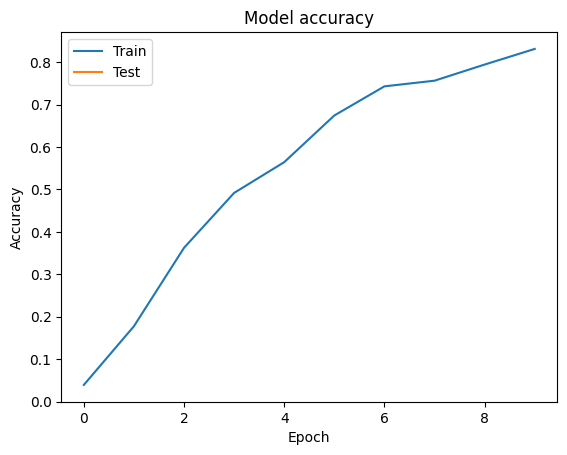

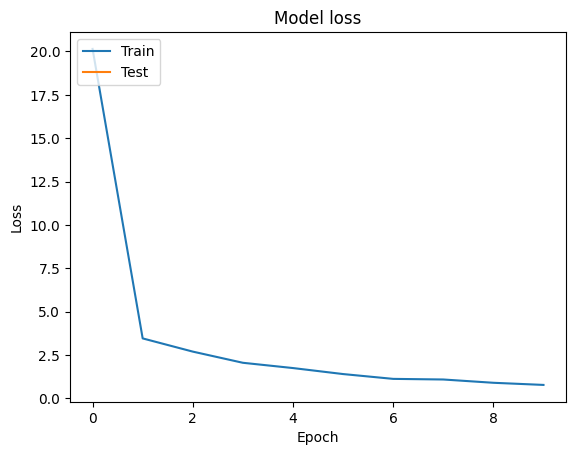

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()